In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn
import csv

import dataset
import datasplit
import model.models as models
from model.models import FxRNN
import trainer
import utils

# TEST on POLY DISCRETE

In [2]:
# LOAD
# folders
models_folder = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/models'
model_name = '20201028_fxnet_poly_disc_best'
results_folder = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/result'
results_subfolder = '20201028_fxnet_poly_disc'

fx_labels = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'fx_labels.npy')), allow_pickle=True)

# Definiowanie liczby klas
n_classes = len(fx_labels)  # Załóżmy, że fx_labels jest listą etykiet, stąd liczba klas to długość tej listy

# Inicjalizacja modelu
fxnet = FxRNN(n_classes=n_classes)

# Załaduj wagi do modelu
fxnet.load_state_dict(torch.load('%s/%s' % (models_folder, model_name), map_location=torch.device('cpu')))

# Przełącz model w tryb ewaluacji
fxnet.eval()

# results
all_train_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_losses.npy')), allow_pickle=True)
all_train_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_correct.npy')), allow_pickle=True)
best_train_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_train_results.npy')), allow_pickle=True)

all_val_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_losses.npy')), allow_pickle=True)
all_val_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_correct.npy')), allow_pickle=True)
best_val_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_val_results.npy')), allow_pickle=True)

all_test_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_losses.npy')), allow_pickle=True)
all_test_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_correct.npy')), allow_pickle=True)
best_test_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_test_results.npy')), allow_pickle=True)

fx_labels = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'fx_labels.npy')), allow_pickle=True)

# datasets size
train_set_size = best_train_results.shape[0]
val_set_size = best_val_results.shape[0]
test_set_size = best_test_results.shape[0]

# example
best_train_results[0]

C:\Users\maszy\AppData\Local\Temp\ipykernel_34976\206436771.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fxnet.load_state_dict(torch.load('%s/%s' % (models_folder, m

array(['48', 'P64-43130-808-O2T5-41215', '0', '0'], dtype='<U26')

Best Train Accuracy:  89.66847599164927
Epoch:  74

Best Val Accuracy:  88.93732150909364
Epoch:  62

Test Accuracy:  88.94901394901395
Epoch:  76



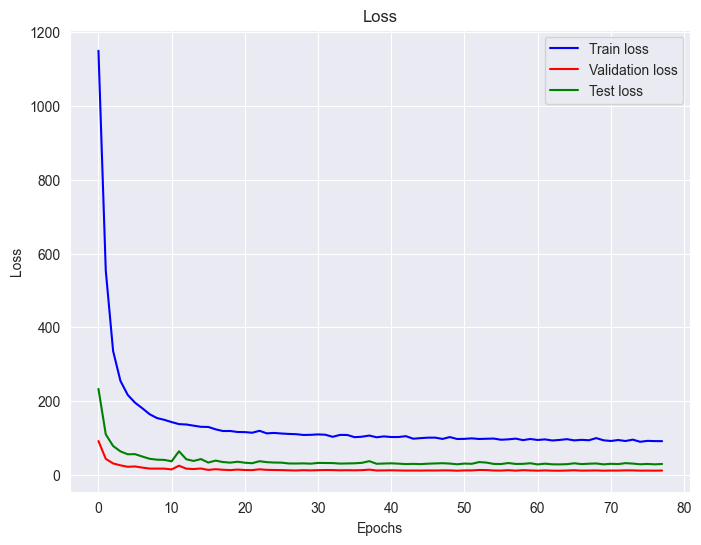

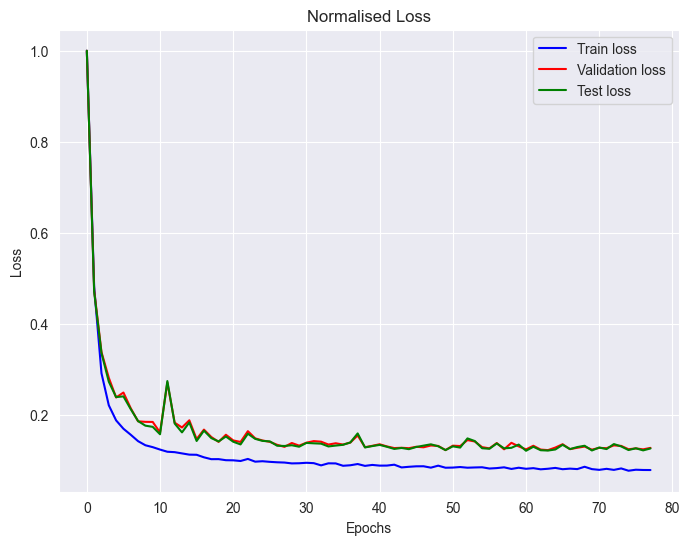

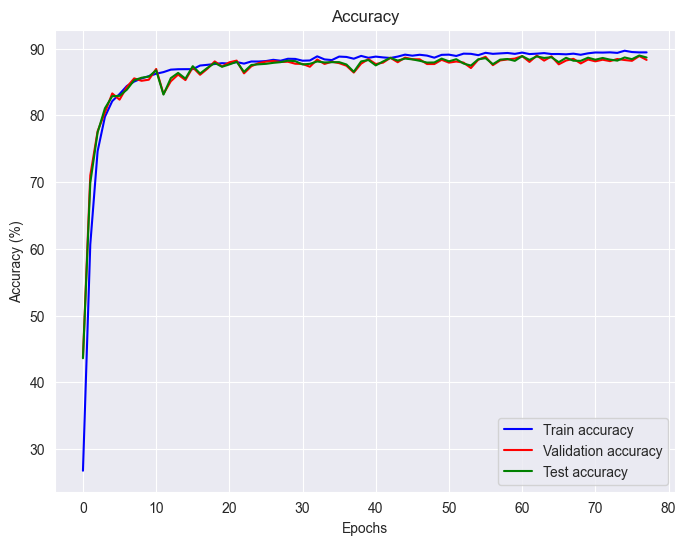

In [3]:
# Ustawienie ścieżki do zapisu
save_path = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/result/figures/Fxnet_poly_disc_plots'

# BEST RESULTS
print('Best Train Accuracy: ', 100 * max(all_train_correct) / train_set_size)
print('Epoch: ', np.argmax(all_train_correct))
print()
print('Best Val Accuracy: ', 100 * max(all_val_correct) / val_set_size)
print('Epoch: ', np.argmax(all_val_correct))
print()
print('Test Accuracy: ', 100 * max(all_test_correct) / test_set_size)
print('Epoch: ', np.argmax(all_test_correct))
print()

# LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(8,6))
plt.grid(True)  # Włącza siatkę
plt.plot(epochs, all_train_losses, 'b', label='Train loss')
plt.plot(epochs, all_val_losses, 'r', label='Validation loss')
plt.plot(epochs, all_test_losses, 'g', label='Test loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'{save_path}/loss_plot.jpeg', format='jpeg')  # Zapisuje wykres w formacie JPEG
plt.show()

# NORMALISED LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(8,6))
plt.grid(True)  # Włącza siatkę
plt.plot(epochs, np.array(all_train_losses) / max(all_train_losses), 'b', label='Train loss')
plt.plot(epochs, np.array(all_val_losses) / max(all_val_losses), 'r', label='Validation loss')
plt.plot(epochs, np.array(all_test_losses) / max(all_test_losses), 'g', label='Test loss')
plt.title('Normalised Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'{save_path}/normalised_loss_plot.jpeg', format='jpeg')  # Zapisuje wykres w formacie JPEG
plt.show()

# ACCURACY
all_train_perc_correct = 100 * np.array(all_train_correct) / train_set_size
all_val_perc_correct = 100 * np.array(all_val_correct) / val_set_size
all_test_perc_correct = 100 * np.array(all_test_correct) / test_set_size
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(8,6))
plt.grid(True)  # Włącza siatkę
plt.plot(epochs, all_train_perc_correct, 'b', label='Train accuracy')
plt.plot(epochs, all_val_perc_correct, 'r', label='Validation accuracy')
plt.plot(epochs, all_test_perc_correct, 'g', label='Test accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.savefig(f'{save_path}/accuracy_plot.jpeg', format='jpeg')  # Zapisuje wykres w formacie JPEG
plt.show()

Best Validation Accuracy:  88.93732150909364 at epoch  62
Training Accuracy:  89.22755741127348
Test Accuracy:  88.81673881673882


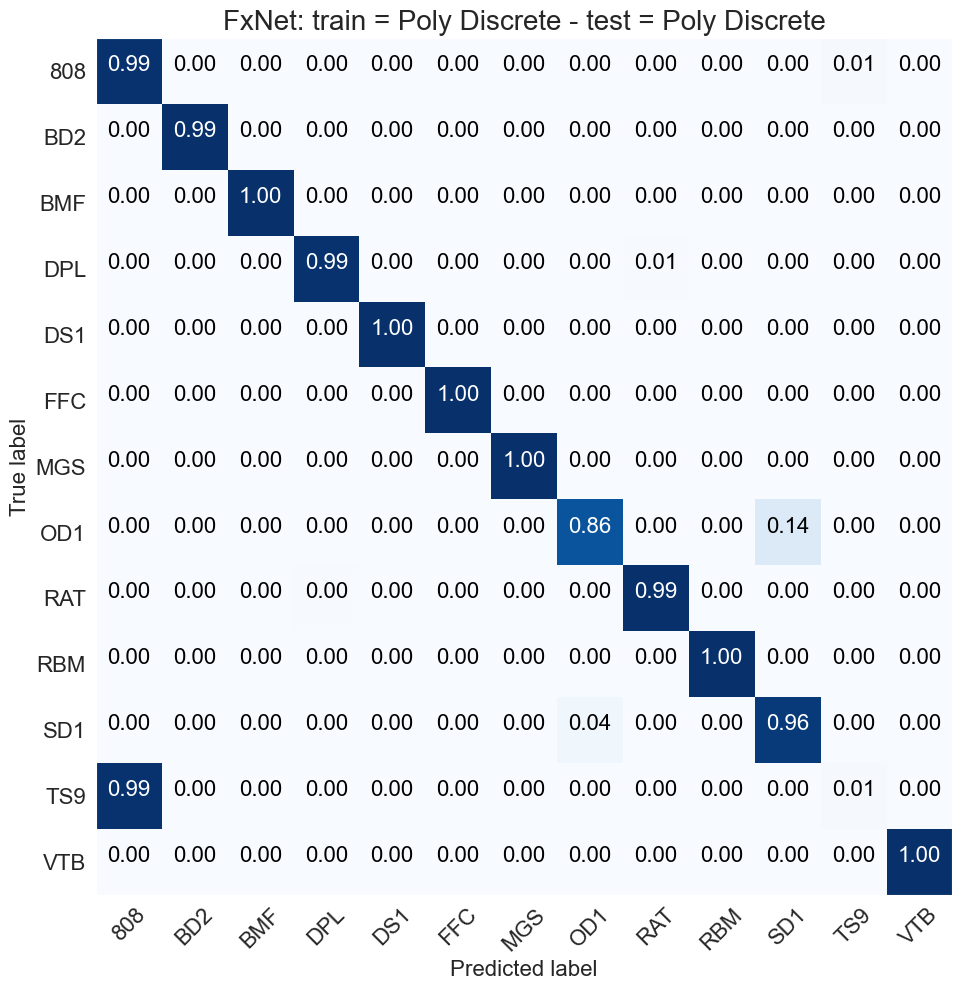

In [4]:
# CONFUSION MATRIX

# Find best performance epoch based on validation
best_val = 100 * max(all_val_correct) / val_set_size
best_val_idx = np.argmax(all_val_correct)

print("Best Validation Accuracy: ",best_val, "at epoch ", best_val_idx)
print("Training Accuracy: ", 100 * all_train_correct[best_val_idx] / train_set_size)
print("Test Accuracy: ", 100 * all_test_correct[best_val_idx] / test_set_size)

# extract predictions and targets vectors
train_preds = best_train_results[:, 2]
train_targets = best_train_results[:, 3]
val_preds = best_val_results[:, 2]
val_targets = best_val_results[:, 3]
test_preds = best_test_results[:, 2]
test_targets = best_test_results[:, 3]

# calculate
train_cm = confusion_matrix(y_true=train_targets, y_pred=train_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
val_cm = confusion_matrix(y_true=val_targets, y_pred=val_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
test_cm = confusion_matrix(y_true=test_targets, y_pred=test_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])

# plot
plt.figure(figsize=(10,10))
plt.grid(False)
utils.plot_confusion_matrix(test_cm, fx_labels, normalize=True, title='FxNet: train = Poly Discrete - test = Poly Discrete', title_fontsize=20, text_fontsize=16)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'fxnet_cm_PD_PD.eps'), format='eps')

# TEST on POLY CONTINUOUS

In [5]:
# dataset
dataset_poly_cont = dataset.FxDataset(
    root='G:/PracaMagisterska/Dane/Poly_Continuous_Audio',
    excl_folders=['MT2'], 
    spectra_folder='mel_22050_1024_512', 
    processed_settings_csv='proc_settings.csv',
    max_num_settings=3,
    transform=transforms.Compose([transforms.ToTensor()])
)

# initialise
dataset_poly_cont.init_dataset()
# generate features - necessary only the first time
# dataset_mono_rnd.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_poly_cont = datasplit.DataSplit(dataset_poly_cont, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_poly_cont = split_poly_cont.get_split(batch_size=100)

len(dataset_poly_cont)

130000

In [6]:
# TEST
test_poly_cont_loss, test_poly_cont_correct, test_poly_cont_results = trainer.test_fx_net(
    model=fxnet, 
    test_loader=test_loader_poly_cont, 
    test_sampler=split_poly_cont.test_sampler,
    loss_function=nn.CrossEntropyLoss(), 
    device='cpu'
)

====> Test Loss: 420.6744	 Avg Loss: 0.0032	Correct: 114173/130000	Percentage Correct: 87.83


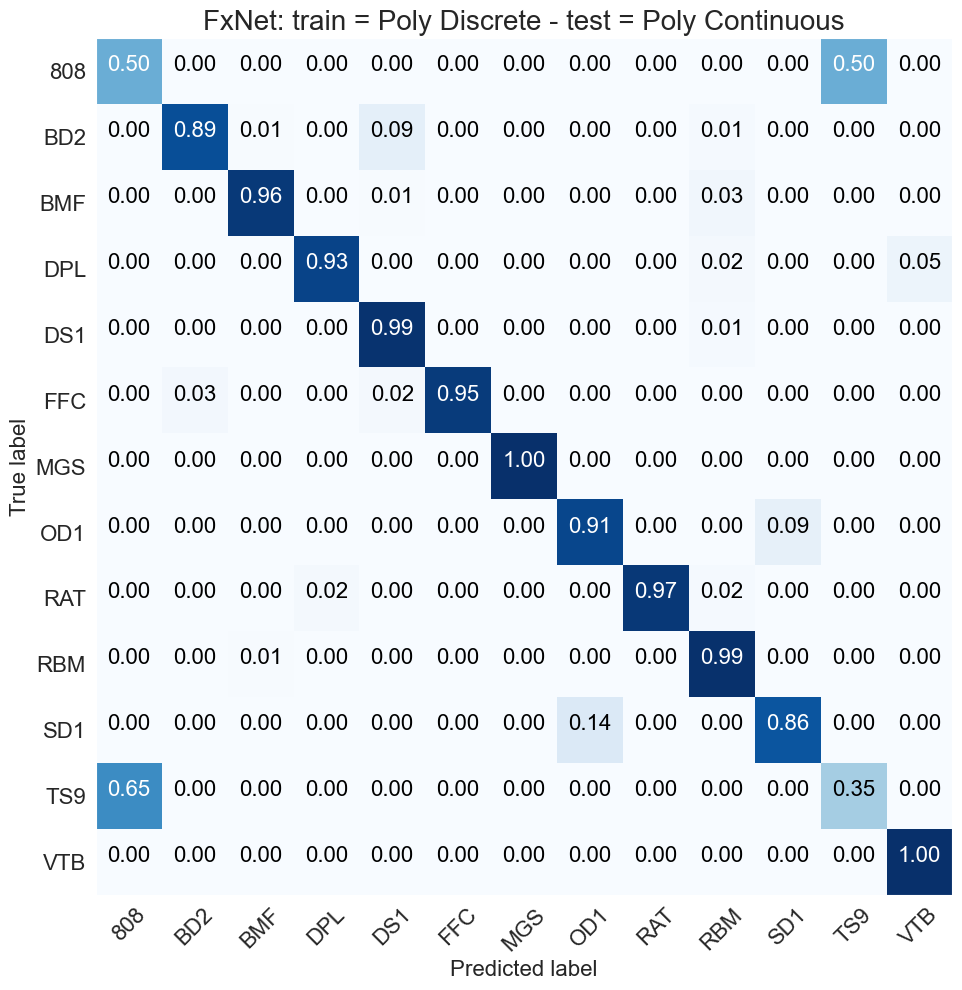

In [8]:
# results
test_poly_cont_preds = np.array(test_poly_cont_results)[:, 2]
test_poly_cont_targets = np.array(test_poly_cont_results)[:, 3]

# calculate conf. matrix
test_poly_cont_cm = confusion_matrix(y_true=test_poly_cont_preds, y_pred=test_poly_cont_targets, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])

# plot
plt.figure(figsize=(10,10))
plt.grid(False)
utils.plot_confusion_matrix(test_poly_cont_cm, fx_labels, normalize=True, title='FxNet: train = Poly Discrete - test = Poly Continuous', title_fontsize=20, text_fontsize=16)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'fxnet_cm_PD_PC.eps'), format='eps')